In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
train_x = train_x.reshape((len(train_x), np.prod(train_x.shape[1:])))
test_x = test_x.reshape((len(test_x), np.prod(test_x.shape[1:])))

print (train_x.shape)
print (test_x.shape)

(60000, 784)
(10000, 784)


In [5]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x) # train_x.astype('float32') / 255.
test_x = scaler.fit_transform(test_x) # test_x = test_x.astype('float32') / 255.

print (train_x.shape)
print (test_x.shape)

(60000, 784)
(10000, 784)


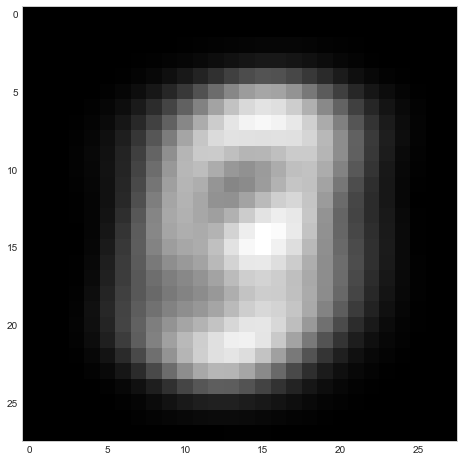

In [6]:
mean = np.mean(train_x, axis=0)

img_mean = np.array(mean).reshape(28, 28)
plt.figure(figsize=(15, 8))
plt.grid(False)
plt.imshow(img_mean, cmap='gray')

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


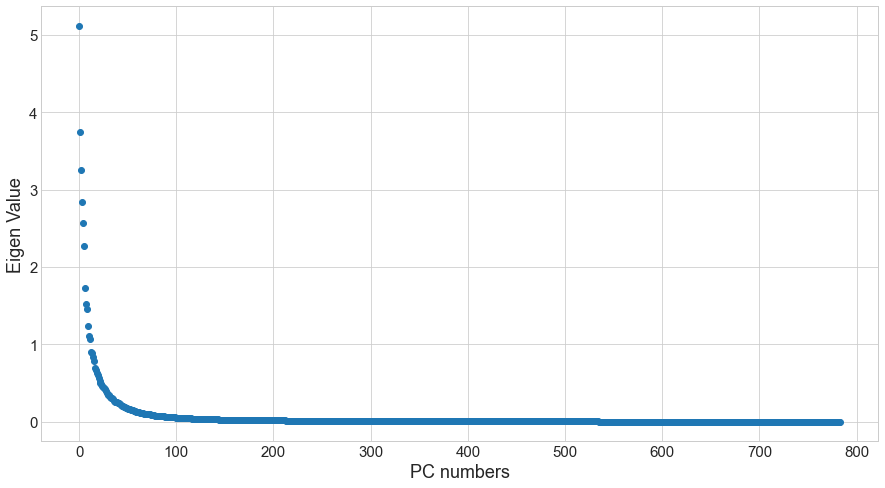

In [7]:
mean_centering = train_x - mean
cov_mat = np.cov(train_x, rowvar=0)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals_sorted = np.argsort(eig_vals)[::-1]

plt.figure(figsize=(15, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Eigen Value', fontsize=18)
plt.xlabel('PC numbers', fontsize=18)
plt.scatter(range(eig_vals.shape[0]), eig_vals[eig_vals_sorted])

(784, 5)


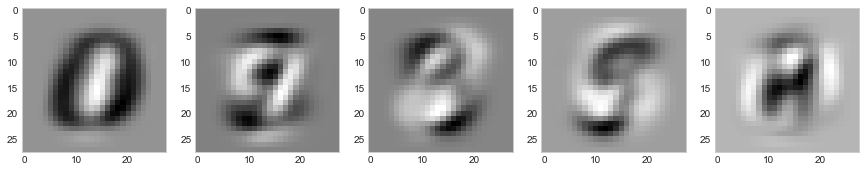

In [8]:
print(eig_vecs[:, eig_vals_sorted[:5]].shape)
plt.figure(figsize=(15, 8))
for i in range(5):
    img_reshaped = eig_vecs[:, eig_vals_sorted[i]].reshape(28, 28)
    plt.subplot(1, 5, i+1)
    plt.grid(False)
    plt.imshow(img_reshaped.real, cmap='gray')

In [9]:
reduced_data = np.matmul(eig_vecs[:, eig_vals_sorted[:2]].T, train_x.T)
print(reduced_data.shape)

reduced_data = np.vstack((reduced_data, train_y)).T
print(reduced_data.shape)

(2, 60000)
(60000, 3)


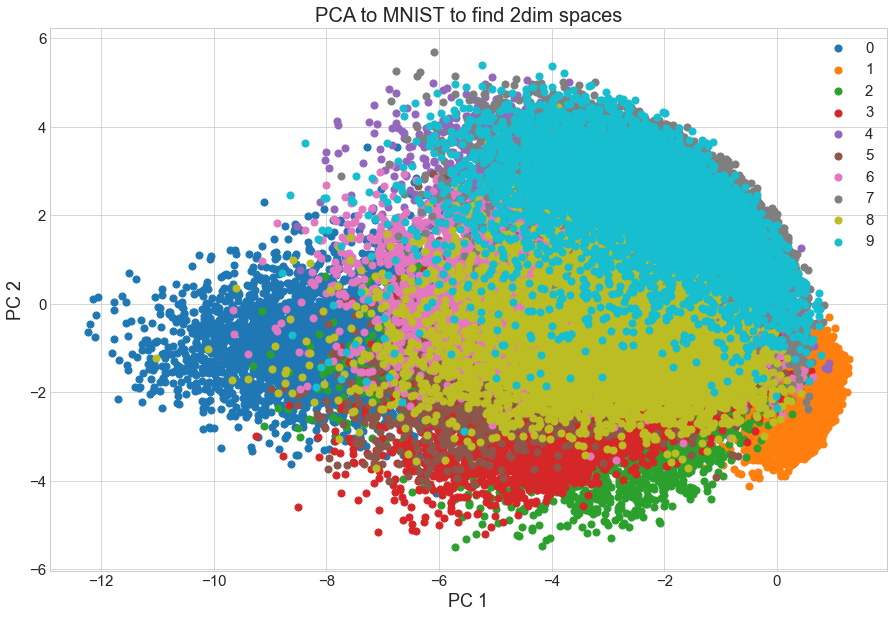

In [10]:
df_PCA = pd.DataFrame(data=reduced_data, columns=('PC1', 'PC2', 'label'))
targets = [i for i in range(10)]

plt.figure(figsize=(15, 10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('PC 1', fontsize=18)
plt.ylabel('PC 2', fontsize=18)
plt.title('PCA to MNIST to find 2dim spaces', fontsize=20)
for target in targets:
    plt.scatter(df_PCA.loc[df_PCA['label'] == target, 'PC1'], 
                df_PCA.loc[df_PCA['label'] == target, 'PC2'], s=50)

plt.legend(targets, prop={'size': 15})